In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# What drives condo prices in New York?

Using FRED data, we will attempt to explain what drives condo prices in New York.  In order to do this, we used the following data sources:

1. Condo Price Index for NY (https://fred.stlouisfed.org/series/NYXRCSA)
2. Average Weekly Wages for Employees in Private Establishments in New York-Northern New Jersey-Long Island, NY-NJ-PA (https://fred.stlouisfed.org/series/ENUC356240510SA)
3. Unemployment Level for New York (https://fred.stlouisfed.org/series/UNEMPLOYNY)
4. Consumer Price Index: Total All Items for the United States (https://fred.stlouisfed.org/series/CPALTT01USQ661S)
5. Mortgage Debt Service Payments as a Percent of Disposable Personal Income (https://fred.stlouisfed.org/series/MDSP)


# Hypothesis to test

We believe these 4 data sources should help explain condo prices.  Our hypothesis includes:

1. Average Weekly Wages for Employees in Private Establishments in New York-Northern New Jersey-Long Island, NY-NJ-PA:  A rise in wages leads to a rise in condo prices due to increased wealth, consumer confidence, and supply of funds.

2. Unemployment level in New York:  A rise in unemployment leads to a decrease in condo prices due to a decrease in wealth, and confidence about the future.

3. Consumer Price Index:  A rise in prices leads to increased condo prices as it signifies a rise in inflation (increased supply of money)

4. Mortgage Debt Service Payments as a Percent of Disposable Income:  As mortgage payments rise as a percentage of disposable income, condo prices should rise since it signifies an increase in supply of funds

In [42]:
#Load the data
econ_data = pd.read_csv('condos.csv')
#econ_data.set_index(econ_data['observation_date'], inplace=True)
#del econ_data['observation_date']

econ_data['condo_price_chg'] = econ_data.condo_price.pct_change()*100
econ_data['wages_chg'] = econ_data.wages.pct_change()*100
econ_data['unemployment_chg'] = econ_data.unemployment.pct_change()*100
econ_data['cpi_chg'] = econ_data.cpi.pct_change()*100
econ_data['mortgage_chg'] = econ_data.mortgage.pct_change()*100


econ_data.dropna(inplace=True)
econ_data=econ_data[~econ_data.isin([np.nan, np.inf, -np.inf]).any(1)]
econ_data.head()

,observation_date,condo_price,wages,unemployment,cpi,mortgage,condo_price_chg,wages_chg,unemployment_chg,cpi_chg,mortgage_chg
1,2004-01-01,165.201734,1054.8,609400,85.620404,5.824818,1.576610,0.075901,1.991632,0.846237,-0.149720
2,2004-04-01,173.189283,1065.4,599900,86.293016,5.824580,4.835027,1.004930,-1.558910,0.785574,-0.004086
3,2004-07-01,183.551333,1091.4,578600,86.843334,5.918571,5.983078,2.440398,-3.550592,0.637733,1.613696
4,2004-10-01,190.326022,1124.7,550700,87.775819,5.992869,3.690896,3.051127,-4.821984,1.073755,1.255337
5,2005-01-01,198.305490,1086.5,505400,88.219131,6.225458,4.192526,-3.396461,-8.225894,0.505051,3.881096


# Visualize the relationships between variables

As expected, there are linear relationships between condo prices and the other 4 variables, with all being positive with the exception of unemployment.

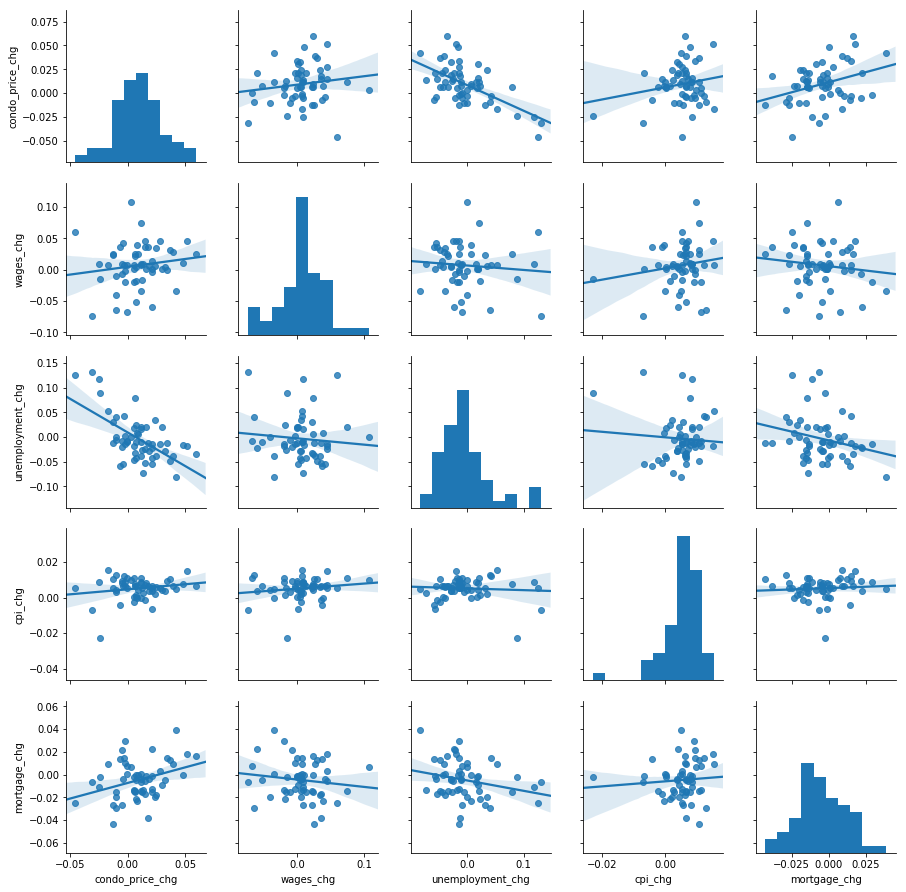

In [25]:
#melt the data for visualization (not used yet)
econ_data_melt = pd.melt(econ_data, id_vars='observation_date', value_vars=['condo_price_chg','wages_chg','unemployment_chg','cpi_chg','mortgage_chg'])

#Scatterplot the 5 variables
sns.pairplot(econ_data[['condo_price_chg','wages_chg','unemployment_chg','cpi_chg','mortgage_chg']],kind="reg")

# Using Linear Regression to better understand what drives condo prices

Interpreting the coefficients:

1. A 1% increse in wages contributes to a .06% rise in condo prices in NY.
2. A 1% increase in unemployment contributes to a .23% decline in condo prices in NY.
3. A 1% increase in CPI contributes to a .39% rise in condo prices in NY.
4. A 1% increase in mortgage payments as a percent of disposable income contributes to a .25% rise in condo prices in NY.

coefficients: [ 0.06377141 -0.23818676  0.39150976  0.25868011]
intercept: 0.7301880462675341
score: 0.4332371912678612


,Coefficient
wages_chg,0.063771
unemployment_chg,-0.238187
cpi_chg,0.391510
mortgage_chg,0.258680


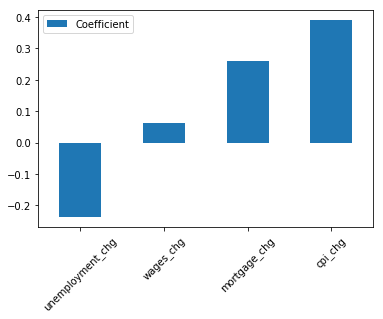

In [43]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

X = econ_data.loc[:, ~econ_data.columns.isin(['condo_price','condo_price_chg','wages','unemployment','cpi','mortgage','observation_date'])]
y = list(econ_data.condo_price_chg)

lm.fit(X,y)

print('coefficients: ' + str(lm.coef_))
print('intercept: ' + str(lm.intercept_))
print('score: ' + str(lm.score(X,y)))

feats = {} # a dict to hold feature_name: feature_importance
for feature, coeff in zip(X.columns, lm.coef_):
    feats[feature] = coeff #add the name/value pair 

coeffs = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Coefficient'})
coeffs.sort_values(by='Coefficient').plot(kind='bar', rot=45)

coeffs

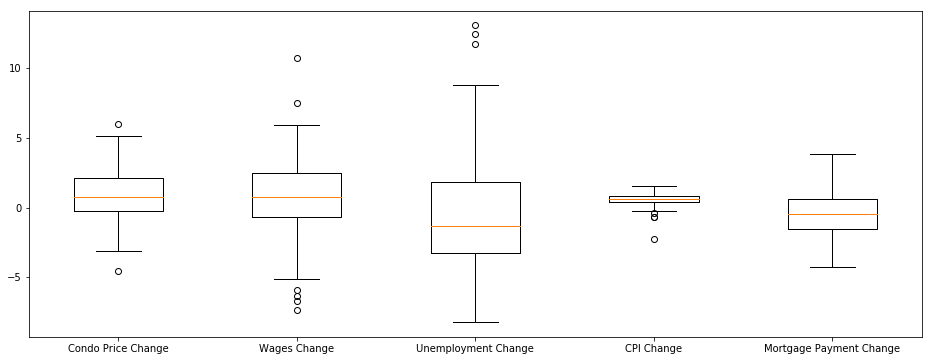

In [44]:
#Investigating outliers
#Boxplots
fig = plt.figure(figsize=(16,6))
plt.boxplot([econ_data.condo_price_chg, econ_data.wages_chg, econ_data.unemployment_chg, econ_data.cpi_chg, econ_data.mortgage_chg])
plt.xticks([1,2,3,4,5], ['Condo Price Change','Wages Change', 'Unemployment Change', 'CPI Change','Mortgage Payment Change'])
#plt.xticks(rotation=50)
plt.show()

# Using Robust Regression to better understand what drives condo prices

Interpreting the coefficients:

1. A 1% increse in wages contributes to a .08% rise in condo prices in NY.
2. A 1% increase in unemployment contributes to a .24% decline in condo prices in NY.
3. A 1% increase in CPI contributes to a .29% rise in condo prices in NY.
4. A 1% increase in mortgage payments as a percent of disposable income contributes to a .28% rise in condo prices in NY.

coefficients: [ 0.07837383 -0.24298395  0.28910745  0.28135119]
intercept: 0.7448850110526586
score: 0.43124988402419184


,Coefficient
wages_chg,0.078374
unemployment_chg,-0.242984
cpi_chg,0.289107
mortgage_chg,0.281351


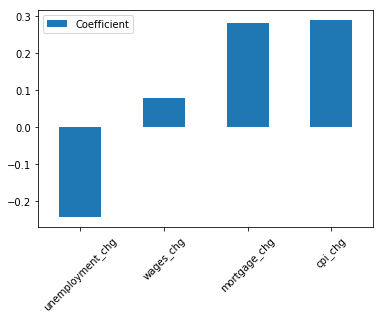

In [45]:
from sklearn.linear_model import HuberRegressor
hr = HuberRegressor()

hr.fit(X,y)
print('coefficients: ' + str(hr.coef_))
print('intercept: ' + str(hr.intercept_))
print('score: ' + str(hr.score(X,y)))


feats = {} # a dict to hold feature_name: feature_importance
for feature, coeff in zip(X.columns, hr.coef_):
    feats[feature] = coeff #add the name/value pair 

coeffs = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Coefficient'})
coeffs.sort_values(by='Coefficient').plot(kind='bar', rot=45)

coeffs

# Conclusion

Using a linear and robust regression yields the following results:

1. A 1% increse in wages contributes to a .06% - .08% rise in condo prices in NY.
2. A 1% increase in unemployment contributes to a .23% -.24% decline in condo prices in NY.
3. A 1% increase in CPI contributes to a .29% - .39% rise in condo prices in NY.
4. A 1% increase in mortgage payments as a percent of disposable income contributes to a .25% - .28% rise in condo prices in NY.

It appears that a rising supply of money from employment or credit (wages, prices, and mortgage payments) as well as increased confidence in the future (low unemployment) explain some of the rise in condo prices in New York.  

Adding other economic indicators of increased wealth and future confidence would be useful going forward to determine what other indicators may be key factors in explaining the rise in prices.
